In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
import datetime as date

%matplotlib inline

STORES

In [2]:
stores = pd.read_csv('../data/stores.csv')
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [3]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


Comprobamos si hay elementos mal escritos

In [4]:
stores['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [5]:
stores['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

Todos los valores están escritos correctamente

HOLIDAYS EVENTS

In [6]:
holidays_events = pd.read_csv('../data/holidays_events.csv')
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [7]:
holidays_events['isHoliday'] = 1

In [8]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
 6   isHoliday    350 non-null    int64 
dtypes: bool(1), int64(1), object(5)
memory usage: 16.9+ KB


Comprobamos en cada columna si hay elementos mal escritos

In [9]:
holidays_events['description'].unique()

# Vemos que algunos de los valores están mal escritos

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

In [10]:
# Mediante el uso de Regex, nos quedamos solo con la parte válida de cada uno de los valores

pattern = re.compile(r'[a-z, A-Z]*')

for i in range(len(holidays_events)):
    if 'Mundial' in holidays_events['description'][i]:
        pass # Como los partidos del Mundial de Brasil contienen caracteres no alfanuméricos, habrá que impedir que se aplique
    else:
        holidays_events['description'][i] = pattern.match(holidays_events['description'][i]).group()

C:\Users\Alex\AppData\Local\Temp\ipykernel_5572\1032198667.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_events['description'][i] = pattern.match(holidays_events['description'][i]).group()


In [11]:
holidays_events['description'].unique()

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito', 'Fundacion de Loja', 'Navidad',
       'Cantonizacion de Salinas', 'Puente N

In [12]:
holidays_events['description'].nunique()

64

In [13]:
holidays_events['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [14]:
holidays_events['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [15]:
holidays_events['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [16]:
# Hemos visto que la columa 'date' es de tipo 'object', por lo que tendremos que cambiarla a tipo 'datetime'. Primero comprobamos
# que los valores estén bien escritos:

holidays_events['date'].unique()

# Aparentemente lo están, pero haremos una segunda comprobación

array(['2012-03-02', '2012-04-01', '2012-04-12', '2012-04-14',
       '2012-04-21', '2012-05-12', '2012-06-23', '2012-06-25',
       '2012-07-03', '2012-07-23', '2012-08-05', '2012-08-10',
       '2012-08-15', '2012-08-24', '2012-09-28', '2012-10-07',
       '2012-10-09', '2012-10-12', '2012-11-02', '2012-11-03',
       '2012-11-06', '2012-11-07', '2012-11-10', '2012-11-11',
       '2012-11-12', '2012-12-05', '2012-12-06', '2012-12-08',
       '2012-12-21', '2012-12-22', '2012-12-23', '2012-12-24',
       '2012-12-25', '2012-12-26', '2012-12-31', '2013-01-01',
       '2013-01-05', '2013-01-12', '2013-02-11', '2013-02-12',
       '2013-03-02', '2013-04-01', '2013-04-12', '2013-04-14',
       '2013-04-21', '2013-04-29', '2013-05-01', '2013-05-11',
       '2013-05-12', '2013-05-24', '2013-06-23', '2013-06-25',
       '2013-07-03', '2013-07-23', '2013-07-24', '2013-07-25',
       '2013-08-05', '2013-08-10', '2013-08-15', '2013-08-24',
       '2013-09-28', '2013-10-07', '2013-10-09', '2013-

In [17]:
# Hacemos la transformación. En caso de que uno estuviera mal escrito, nos devolvería un error.

holidays_events['date'] = pd.to_datetime(holidays_events['date'].astype(str), format='%Y-%m-%d')

In [18]:
# Vemos que, efectivamente, los valores han cambiado correctamente

holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
 6   isHoliday    350 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 16.9+ KB


OIL

In [19]:
oil = pd.read_csv('../data/oil.csv')
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [20]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [21]:
oil['date'] = pd.to_datetime(oil['date'].astype(str))

In [22]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [23]:
oil = oil.fillna(method='bfill')
oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [24]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


Tenemos elementos nulos. Hay elementos suficientes como para entrenar el modelo, por lo que nos limitaremos a eliminarlos.

TRAIN CSV

In [25]:
train = pd.read_csv('../data/train.csv')
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [27]:
train['date'] = pd.to_datetime(train['date'].astype(str))

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [29]:
train = pd.merge(train, oil, on='date', how = 'left')

In [30]:
train = pd.merge(train, holidays_events, on = 'date', how = 'left')

In [31]:
train = pd.merge(train, stores, on = 'store_nbr', how = 'left')

In [32]:
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,isHoliday,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,1.0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,1.0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,1.0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,1.0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,1.0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1.0,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1.0,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1.0,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1.0,Quito,Pichincha,B,6


In [33]:
train['isHoliday'].unique()

array([ 1., nan])

In [34]:
train['isHoliday'].fillna(0, inplace=True)

In [35]:
train['isHoliday'].unique()

array([1., 0.])

In [36]:
train['type_x'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [37]:
train['type_x'].fillna('Work Day', inplace=True)

In [38]:
train['type_x'].unique()

array(['Holiday', 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'],
      dtype=object)

In [39]:
train['type_y'].unique()

array(['D', 'C', 'B', 'E', 'A'], dtype=object)

In [40]:
train['locale'].unique()

array(['National', nan, 'Local', 'Regional'], dtype=object)

In [41]:
train['dcoilwtico'] = train['dcoilwtico'].fillna(method='bfill')

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot

temp  = train.groupby('date')[['sales','dcoilwtico','isHoliday']].agg({'sales':'sum', 'dcoilwtico':'mean' , 'isHoliday':'max'})

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=temp.index, y=temp.sales, name="sales", mode="markers"),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(x=temp.index, y=temp.dcoilwtico, name="WTI oil price", mode="lines"),
    secondary_y=True, 
)
fig.add_trace(
    go.Scatter(x=temp[temp['isHoliday']==1].index, 
               y=temp['isHoliday'][temp['isHoliday']==1] * temp['sales'][temp['isHoliday']==1], name="Holiday", mode="markers"),
    secondary_y=False, 
)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="WTI oil price", secondary_y=True)



iplot(fig)

In [48]:
# Eliminamos las ventas desde 16/04/2016 hasta final de año debido al terremoto que sufrió Ecuador

train = train[(train['date'] <= date.datetime.strptime('2016-04-16', '%Y-%m-%d')) | (train['date'] >= date.datetime.strptime('2016-12-31', '%Y-%m-%d'))]

In [49]:
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale_name,isHoliday,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Holiday,Ecuador,1.0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,93.14,Holiday,Ecuador,1.0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,93.14,Holiday,Ecuador,1.0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Holiday,Ecuador,1.0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,93.14,Holiday,Ecuador,1.0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Riobamba,1.0,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Riobamba,1.0,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Riobamba,1.0,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Riobamba,1.0,Quito,Pichincha,B,6


In [50]:
train['type_x'].unique()

array(['Holiday', 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'],
      dtype=object)

In [51]:
train[train['locale_name'].isna()]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale_name,isHoliday,city,state,type_y,cluster
1782,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,93.14,Work Day,NaN,0.0,Quito,Pichincha,D,13
1783,1783,2013-01-02,1,BABY CARE,0.000,0,93.14,Work Day,NaN,0.0,Quito,Pichincha,D,13
1784,1784,2013-01-02,1,BEAUTY,2.000,0,93.14,Work Day,NaN,0.0,Quito,Pichincha,D,13
1785,1785,2013-01-02,1,BEVERAGES,1091.000,0,93.14,Work Day,NaN,0.0,Quito,Pichincha,D,13
1786,1786,2013-01-02,1,BOOKS,0.000,0,93.14,Work Day,NaN,0.0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052561,2999101,2017-08-14,9,POULTRY,283.429,0,47.59,Work Day,NaN,0.0,Quito,Pichincha,B,6
3052562,2999102,2017-08-14,9,PREPARED FOODS,114.120,0,47.59,Work Day,NaN,0.0,Quito,Pichincha,B,6
3052563,2999103,2017-08-14,9,PRODUCE,1348.425,7,47.59,Work Day,NaN,0.0,Quito,Pichincha,B,6
3052564,2999104,2017-08-14,9,SCHOOL AND OFFICE SUPPLIES,182.000,11,47.59,Work Day,NaN,0.0,Quito,Pichincha,B,6


In [ ]:
train.drop(['locale', 'description', 'transferred', 'locale_name'], axis=1, inplace=True)

In [53]:
le = preprocessing.LabelEncoder()
le.fit(train['type_x'])
train['type_x'] = le.transform(train['type_x'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_21816\3587011314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['type_x'] = le.transform(train['type_x'])


In [54]:
le.fit(train['type_y'])
train['type_y'] = le.transform(train['type_y'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_21816\1232843109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['type_y'] = le.transform(train['type_y'])


In [55]:
le.fit(train['family'])
train['family'] = le.transform(train['family'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_21816\2038389872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['family'] = le.transform(train['family'])


In [56]:
le.fit(train['state'])
train['state'] = le.transform(train['state'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_21816\1387858584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['state'] = le.transform(train['state'])


In [57]:
le.fit(train['city'])
train['city'] = le.transform(train['city'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_21816\1923471330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['city'] = le.transform(train['city'])


In [58]:
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,isHoliday,city,state,type_y,cluster
0,0,2013-01-01,1,0,0.000,0,93.14,3,1.0,18,12,3,13
1,1,2013-01-01,1,1,0.000,0,93.14,3,1.0,18,12,3,13
2,2,2013-01-01,1,2,0.000,0,93.14,3,1.0,18,12,3,13
3,3,2013-01-01,1,3,0.000,0,93.14,3,1.0,18,12,3,13
4,4,2013-01-01,1,4,0.000,0,93.14,3,1.0,18,12,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,28,438.133,0,47.57,3,1.0,18,12,1,6
3054344,3000884,2017-08-15,9,29,154.553,1,47.57,3,1.0,18,12,1,6
3054345,3000885,2017-08-15,9,30,2419.729,148,47.57,3,1.0,18,12,1,6
3054346,3000886,2017-08-15,9,31,121.000,8,47.57,3,1.0,18,12,1,6


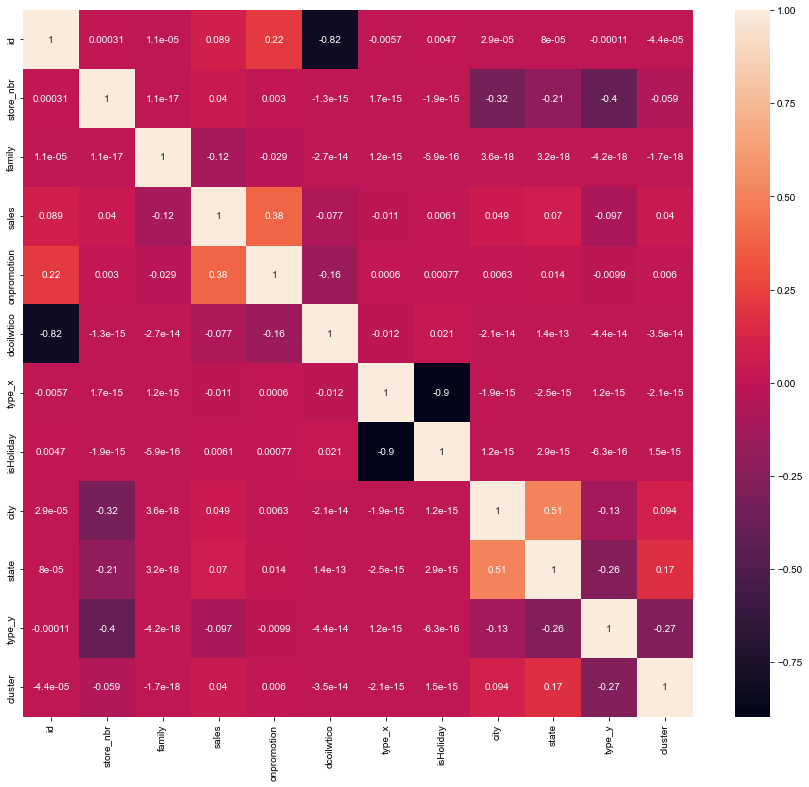

In [59]:
plt.figure(figsize=[15,13])
sns.heatmap(train.corr(), annot=True)
sns.set(rc = {'figure.figsize':(10,10)})

In [60]:
train['month'] = train['date'].apply(lambda x: x.month)

C:\Users\Alex\AppData\Local\Temp\ipykernel_21816\2042697420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train['date'].apply(lambda x: x.month)


In [61]:
train['week_day'] = train['date'].apply(lambda x: x.isoweekday())

C:\Users\Alex\AppData\Local\Temp\ipykernel_21816\1326858252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['week_day'] = train['date'].apply(lambda x: x.isoweekday())


In [62]:
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,isHoliday,city,state,type_y,cluster,month,week_day
0,0,2013-01-01,1,0,0.000,0,93.14,3,1.0,18,12,3,13,1,2
1,1,2013-01-01,1,1,0.000,0,93.14,3,1.0,18,12,3,13,1,2
2,2,2013-01-01,1,2,0.000,0,93.14,3,1.0,18,12,3,13,1,2
3,3,2013-01-01,1,3,0.000,0,93.14,3,1.0,18,12,3,13,1,2
4,4,2013-01-01,1,4,0.000,0,93.14,3,1.0,18,12,3,13,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,28,438.133,0,47.57,3,1.0,18,12,1,6,8,2
3054344,3000884,2017-08-15,9,29,154.553,1,47.57,3,1.0,18,12,1,6,8,2
3054345,3000885,2017-08-15,9,30,2419.729,148,47.57,3,1.0,18,12,1,6,8,2
3054346,3000886,2017-08-15,9,31,121.000,8,47.57,3,1.0,18,12,1,6,8,2


In [63]:
X = train.drop(['sales', 'date'], axis=1).set_index('id')
y = train['sales']

In [71]:
X

,store_nbr,family,onpromotion,dcoilwtico,type_x,isHoliday,city,state,type_y,cluster,month,week_day
id,,,,,,,,,,,,
0,1,0,0,93.14,3,1.0,18,12,3,13,1,2
1,1,1,0,93.14,3,1.0,18,12,3,13,1,2
2,1,2,0,93.14,3,1.0,18,12,3,13,1,2
3,1,3,0,93.14,3,1.0,18,12,3,13,1,2
4,1,4,0,93.14,3,1.0,18,12,3,13,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,9,28,0,47.57,3,1.0,18,12,1,6,8,2
3000884,9,29,1,47.57,3,1.0,18,12,1,6,8,2
3000885,9,30,148,47.57,3,1.0,18,12,1,6,8,2


In [65]:
y

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
3054343     438.133
3054344     154.553
3054345    2419.729
3054346     121.000
3054347      16.000
Name: sales, Length: 2576772, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [78]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 10)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [79]:
rfr.score(X_test,y_test)

0.947428689603478

In [61]:
# from plotly.offline import init_notebook_mode, iplot
# from plotly import graph_objs as go

In [62]:
# def plotly_df(df, title=''):
#     """Visualize all the dataframe columns as line plots."""
#     common_kw = dict(x=df.index, mode='lines')
#     data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
#     layout = dict(title=title)
#     fig = dict(data=data, layout=layout)
#     iplot(fig, show_link=False)

In [63]:
# train_plot = train[['date','sales']]

In [64]:
# train_plot = train_plot.set_index('date')

In [ ]:
# plotly_df(train_plot, title='')